In [1]:
%matplotlib inline 
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from torchvision import datasets, transforms

#number of sub processes  to use for data loading
num_workers = 0

#convert the data to torch.FloatTensor
transform = transforms.ToTensor()
mnist_train = datasets.MNIST(root='/.datasets', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='/.datasets', train=False, transform=transform, download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /.datasets\MNIST\raw\train-images-idx3-ubyte.gz to /.datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /.datasets\MNIST\raw\train-labels-idx1-ubyte.gz to /.datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /.datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to /.datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /.datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to /.datasets\MNIST\raw



C:\Users\Adarsh\anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [34]:
# prepare data loaders
batch_size=20
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=20,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=20,num_workers=num_workers)

C:\Users\Adarsh\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


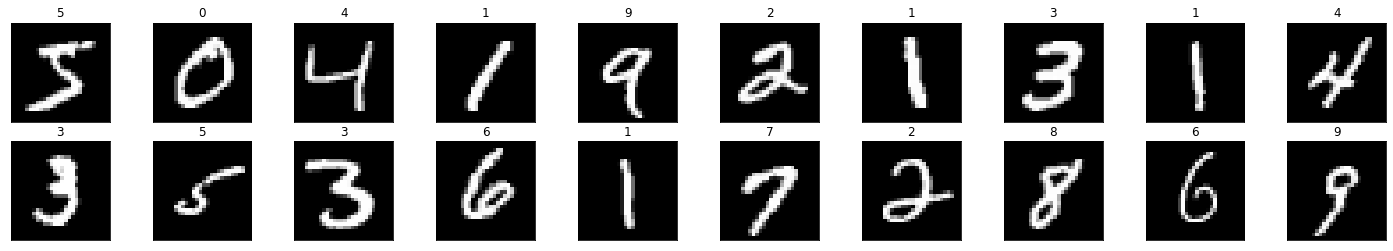

In [12]:
#obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=  fig.add_subplot(2,20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]),cmap='gray')
    #print out the correct label for each image
    #.item() gets the value contained in the tensor
    ax.set_title(str(labels[idx].item()))
    

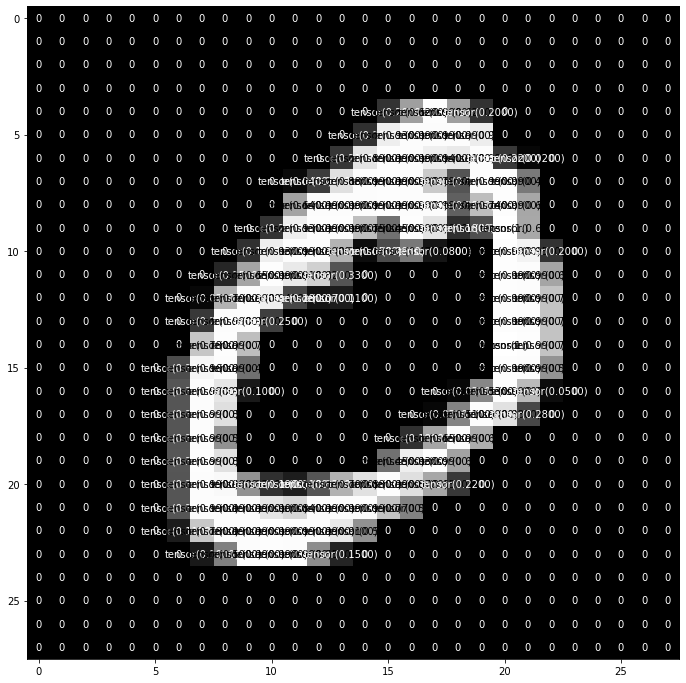

In [27]:
#view an image in more detail
img = np.squeeze(images[1])
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.imshow(img,cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = np.round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val),xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
        

In [28]:
import torch.nn as nn
import torch.nn.functional as F

#Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(28*28,500)
        #linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(500,500)
        #Linear Layer (n_hidden -> 10)
        self.fc3 = nn.Linear(500,10)
        #dropout_layer (p=0.2)
        #dropout layer layer prevents overfitting of data
        self.dropout = nn.Dropout(0.2)
    
    def forward(self,x):
        #flatten image input
        x = x.view(-1, 28*28)
        #add hidden layer with ReLu activation function
        x = F.relu(self.fc1(x))
        return x
    
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [29]:
#Specify loss And optimization functions

#specify loss func 
criterion = nn.CrossEntropyLoss()

#specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#### Train the Network
The steps for training/learning from a batch of data are described in the comments below:

Clear the gradients of all optimized variables
Forward pass: compute predicted outputs by passing inputs to the model
Calculate the loss
Backward pass: compute gradient of the loss with respect to model parameters
Perform a single optimization step (parameter update)
Update average training loss
The following loop trains for 30 epochs; feel free to change this number. For now, we suggest somewhere between 20-50 epochs. As you train, take a look at how the values for the training loss decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [32]:
#number of epochs to train the model
n_epochs = 30
model.train() #prepare model for training
for epoch in range(n_epochs):
    #monitor training loss
    train_loss = 0.0
    
    #train the model
    for data, target in train_loader:
        #clear the gradients of all optimised variables
        optimizer.zero_grad()
        #forward_pass : compute predicted outputs by passing inputs to the model
        output = model(data)
        #calculate the loss
        loss = criterion(output, target)
        #backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        #perform a single optimizer step(parameter update)
        optimizer.step()
        #update running training loss
        train_loss += loss.item()*data.size(0)
        
    #print training statistics
    #calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    print('Epoch: {} \tTraining Loss: {}'.format(epoch+1,train_loss))

Epoch: 1 	Training Loss: 0.3041521268178088
Epoch: 2 	Training Loss: 0.3006973857677852
Epoch: 3 	Training Loss: 0.297692137459293
Epoch: 4 	Training Loss: 0.29504172985426463
Epoch: 5 	Training Loss: 0.29268041188890737
Epoch: 6 	Training Loss: 0.2905578729893702
Epoch: 7 	Training Loss: 0.28863523044390604
Epoch: 8 	Training Loss: 0.2868818705311666
Epoch: 9 	Training Loss: 0.28527345245176305
Epoch: 10 	Training Loss: 0.2837902855249122
Epoch: 11 	Training Loss: 0.282416277253457
Epoch: 12 	Training Loss: 0.2811380811812511
Epoch: 13 	Training Loss: 0.27994456997226613
Epoch: 14 	Training Loss: 0.27882637809224736
Epoch: 15 	Training Loss: 0.27777553095885865
Epoch: 16 	Training Loss: 0.27678521019949887
Epoch: 17 	Training Loss: 0.2758495325089122
Epoch: 18 	Training Loss: 0.27496339492235955
Epoch: 19 	Training Loss: 0.27412234421027826
Epoch: 20 	Training Loss: 0.2733224898978757
Epoch: 21 	Training Loss: 0.2725603820128987
Epoch: 22 	Training Loss: 0.2718329716862645
Epoch: 23 	

In [36]:
#initialize list to monitor test loss na daccuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()  #prepare model for evaluation

for data, target in test_loader:
    #forward pass: compute predicted output by passing inputs to the models
    output = model(data)
    #calculate the loss
    loss = criterion(output, target)
    #update test lost
    test_loss +=loss.item()*data.size(0)
    #convert output probabilities to predicted class
    _, pred =  torch.max(output,1)
    # compare prediction s to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class 
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
        
#calculate and print average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i]>0:
        print('Test Accuracy of %5s: %2d%%(%2d/%2d)'%(str(i),100*class_correct[i]/class_total[i],
                                                      np.sum(class_correct[i]),
                                                      np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)'%(classes[i]))

print('\nTest Accuracy(overall): %2d%% (%2d/%2d)'%(100.*np.sum(class_correct)/np.sum(class_total),np.sum(class_correct),np.sum(class_total)))


Test Loss: 0.271238

Test Accuracy of     0: 98%(961/980)
Test Accuracy of     1: 97%(1110/1135)
Test Accuracy of     2: 89%(921/1032)
Test Accuracy of     3: 90%(913/1010)
Test Accuracy of     4: 92%(908/982)
Test Accuracy of     5: 87%(782/892)
Test Accuracy of     6: 94%(908/958)
Test Accuracy of     7: 91%(945/1028)
Test Accuracy of     8: 88%(866/974)
Test Accuracy of     9: 91%(919/1009)

Test Accuracy(overall): 92% (9233/10000)


C:\Users\Adarsh\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


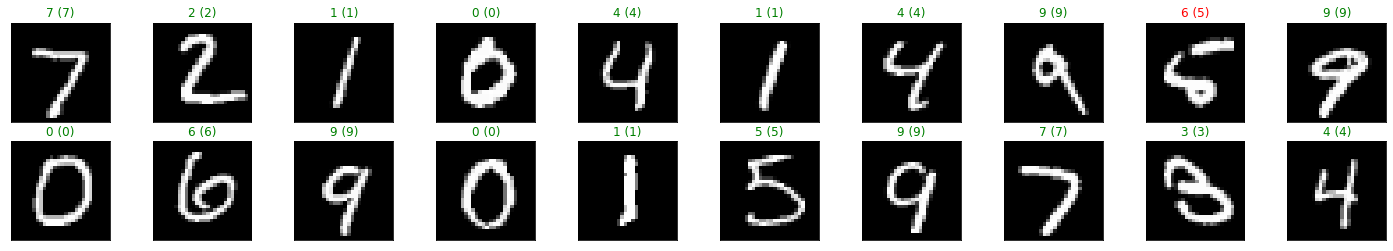

In [41]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))